In [110]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

In [111]:
img = cv2.imread('untitled design.jpg')

In [112]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ori_img = img.shape
print(img.shape)

(148, 269, 3)


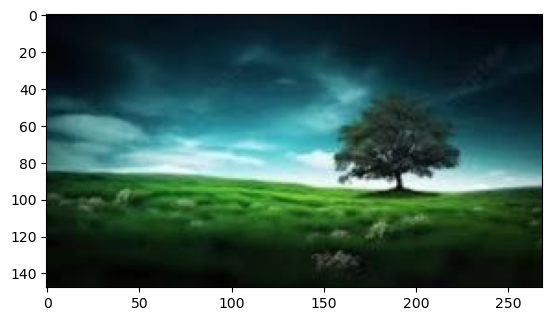

In [113]:
plt.imshow(img)
plt.show()

In [114]:
all_pixels = img.reshape((148*269),3)
print(all_pixels.shape)

(39812, 3)


In [115]:
km = KMeans(n_clusters = 8)
km.fit(all_pixels)

KMeans()

In [116]:
centers = km.cluster_centers_
centers = np.array(centers, dtype='uint8')
print(centers)

[[  8  22  19]
 [119 196 197]
 [ 39 104 112]
 [ 34  76  30]
 [ 20  56  63]
 [ 75 157 160]
 [ 74 141  56]
 [197 234 232]]


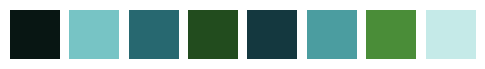

In [117]:
plt.figure(0, figsize=(6, 2))
i = 1
colors = []
for col in centers:
    plt.subplot(1, 8, i)
    plt.axis('off')
    i += 1
    
    colors.append(col)

    a = np.zeros((100, 100, 3), dtype='uint8')
    a[:, :, :] = col
    plt.imshow(a)  # Corrected this line
plt.show()


In [118]:
new_img = np.zeros((148*269,3),dtype = 'uint8')
print(new_img.shape)

(39812, 3)


In [119]:
colors

[array([ 8, 22, 19], dtype=uint8),
 array([119, 196, 197], dtype=uint8),
 array([ 39, 104, 112], dtype=uint8),
 array([34, 76, 30], dtype=uint8),
 array([20, 56, 63], dtype=uint8),
 array([ 75, 157, 160], dtype=uint8),
 array([ 74, 141,  56], dtype=uint8),
 array([197, 234, 232], dtype=uint8)]

In [120]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0])

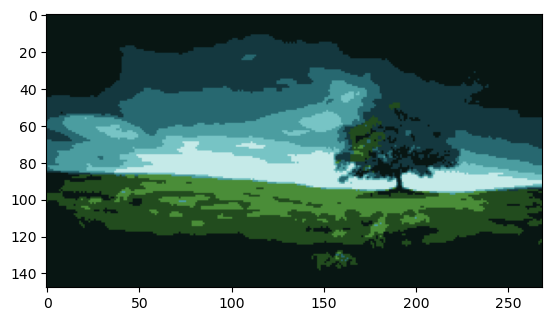

In [121]:
for i in range(new_img.shape[0]):  
    new_img[i] = colors[km.labels_[i]]

new_img = new_img.reshape(ori_img)  

plt.imshow(new_img)
plt.show()
